In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

## Пример

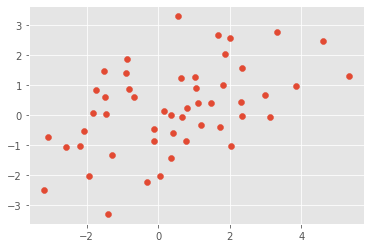

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

In [7]:
data

array([[-1.91901456e+00, -2.00447251e+00],
       [-8.64068364e-01,  1.86750052e+00],
       [ 1.10057353e+00,  4.15221931e-01],
       [ 4.60427341e+00,  2.47717783e+00],
       [-3.06574080e-01, -2.22618701e+00],
       [-3.18333807e+00, -2.47102999e+00],
       [ 8.16532059e-01,  2.49823321e-01],
       [-9.06594573e-01,  1.41291740e+00],
       [ 1.20104556e+00, -3.21519264e-01],
       [-6.79312283e-01,  6.19809976e-01],
       [ 5.57842532e-01,  3.29967395e+00],
       [-1.41397302e+00, -3.28019570e+00],
       [ 5.31421959e+00,  1.31970957e+00],
       [-1.51556257e+00,  1.46400317e+00],
       [-1.29123932e-01, -4.42541574e-01],
       [ 1.65239641e-01,  1.50573105e-01],
       [ 3.60434714e-01, -2.17880795e-03],
       [ 1.03925675e+00,  1.27286156e+00],
       [-2.18673605e+00, -1.03309164e+00],
       [ 1.73939473e+00, -3.83124525e-01],
       [-8.07149304e-01,  8.69176931e-01],
       [ 1.99637068e+00,  2.56670593e+00],
       [ 1.47871100e+00,  3.95418034e-01],
       [ 1.

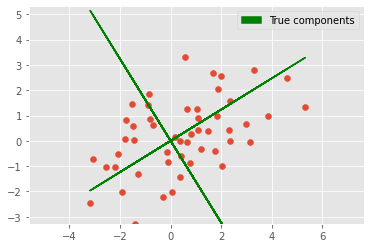

In [8]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [9]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

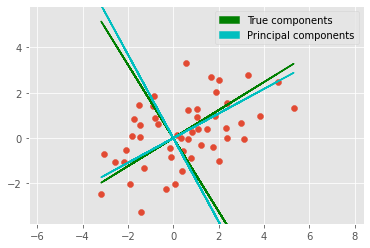

In [10]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

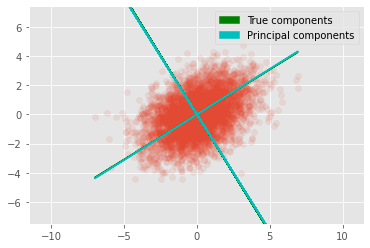

In [11]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

## Задание 1. Автоматическое уменьшение размерности данных при помощи логарифма правдоподобия  L 

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()
    
def write_answer_1(optimal_d):
    with open("pca_answer1.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task1.csv')



In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.238399,-1.311330,-0.782298,-0.341821,0.469353,-0.431860,0.602948,1.220206,1.525103,-0.991354,...,-0.559927,-0.532534,-0.465923,0.874697,-0.108972,-0.080328,0.448971,2.080754,-1.535373,-0.460125
1,-0.223940,-1.277836,-0.202433,-0.317682,0.081900,-0.624267,-0.577119,-0.489564,0.704099,-0.511071,...,-0.055943,-2.208109,0.027813,-1.663044,0.018190,-0.432993,1.204321,0.705121,-1.106140,0.145533
2,-0.278740,1.342790,-0.734591,0.618881,1.365690,-1.397553,-1.446412,-0.844917,0.845916,-1.574979,...,-1.616313,2.144484,-1.110290,-0.524140,-2.176645,-1.903969,1.715735,0.054220,-1.125896,1.309994
3,0.585189,0.344587,1.512917,0.272105,0.480314,-0.688009,-1.473050,-0.732295,0.407361,0.900369,...,1.107443,-0.948995,0.555096,0.645465,1.291971,0.690657,-0.322088,0.341865,-1.436627,0.231027
4,0.992821,-0.654237,2.431634,-1.167275,0.347093,0.772373,0.766213,-0.441367,0.632604,1.543905,...,0.088682,1.357311,0.739249,-0.213874,0.521273,-0.885125,-1.262695,0.974920,1.139357,-0.104045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.389692,0.219276,1.705347,0.639056,-0.920221,0.820060,-1.319743,0.576356,-1.683934,-0.145866,...,0.477906,1.793263,0.042314,0.579344,1.133539,0.855891,-1.057393,0.424905,0.779232,-1.559978
2996,1.224061,0.372410,2.461428,-1.052051,0.784136,-1.312349,0.166328,-0.486050,0.200969,-0.759246,...,0.211499,0.946581,-1.410370,0.981908,1.003461,-0.106305,0.144014,-0.865218,1.802963,-0.190356
2997,-0.729235,0.921636,-1.290264,1.213381,-0.855209,-2.459783,0.383566,-0.938353,0.062706,-0.289529,...,-1.340029,0.217846,0.748483,1.869968,-0.786416,0.864130,-1.277036,-0.729173,-0.544436,-1.723106
2998,0.494367,-0.388574,0.839700,1.326939,-0.255756,0.587837,1.028524,0.840790,-0.223695,0.187612,...,-0.813682,0.820564,-0.684508,2.170824,-0.759302,0.891681,-0.656515,0.142067,0.174918,1.545366


In [17]:
D = data.shape[1]

In [18]:
D

80

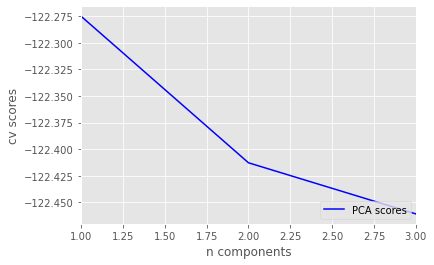

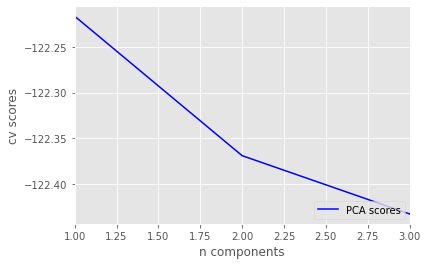

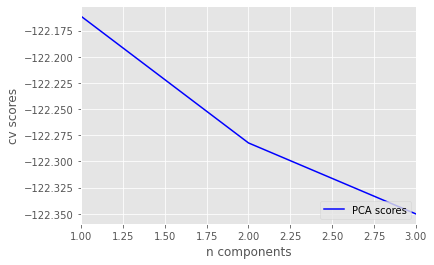

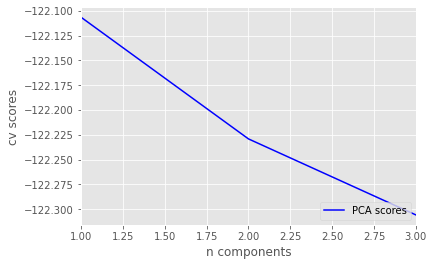

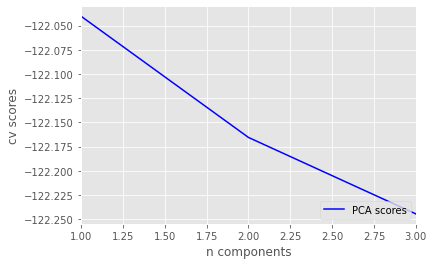

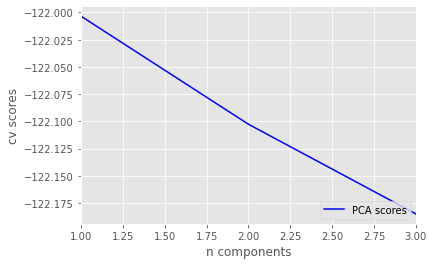

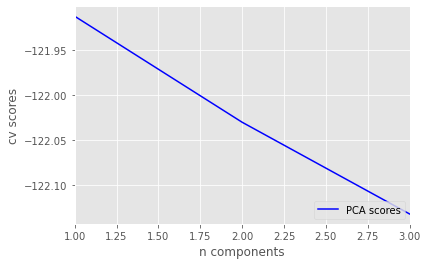

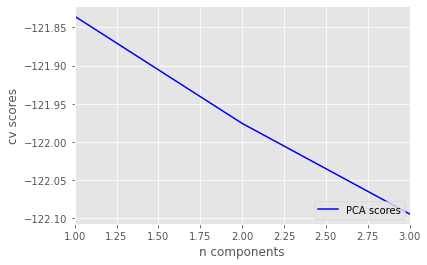

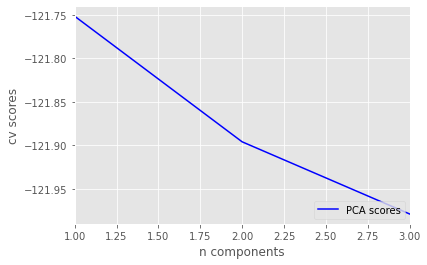

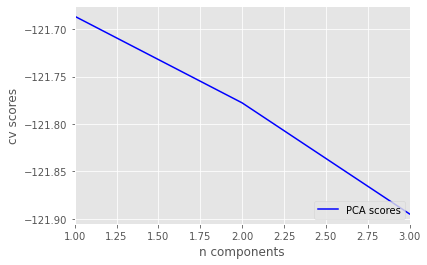

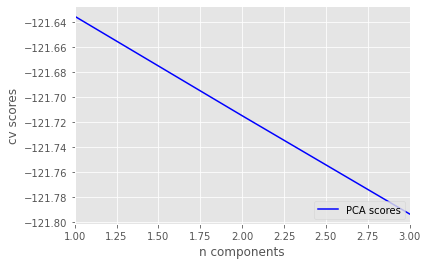

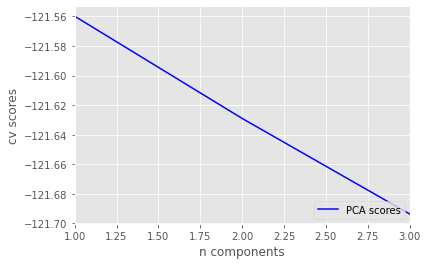

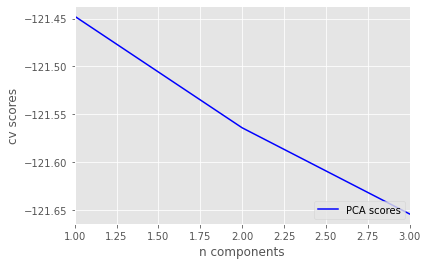

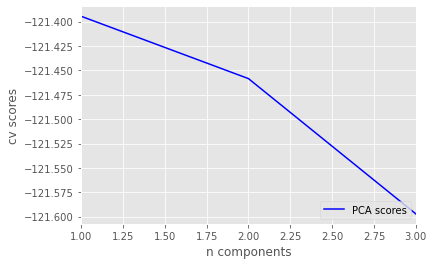

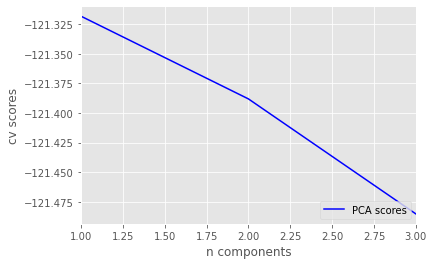

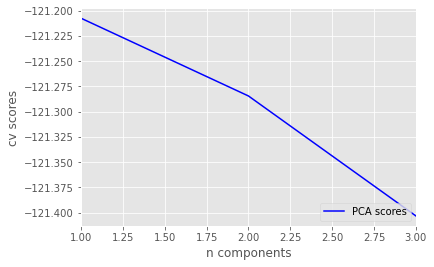

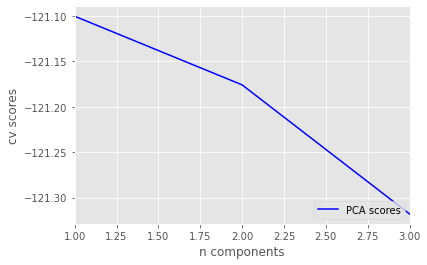

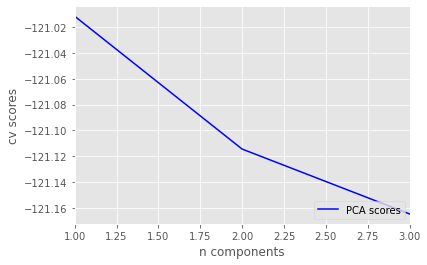

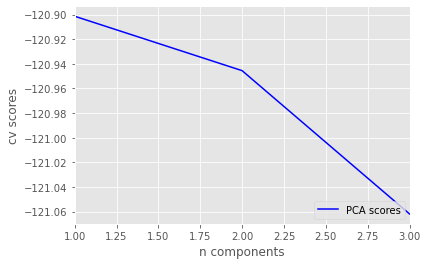

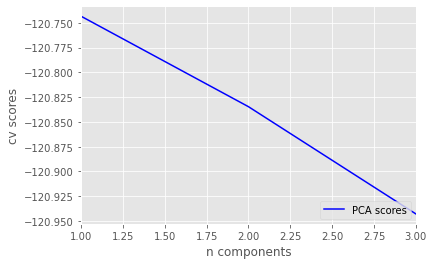

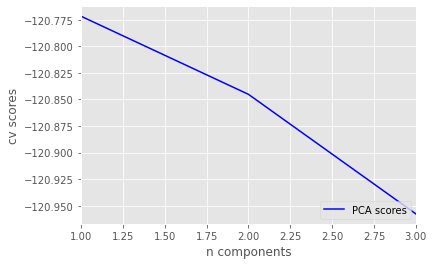

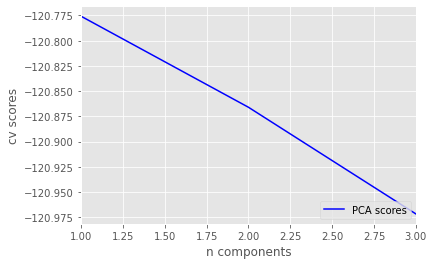

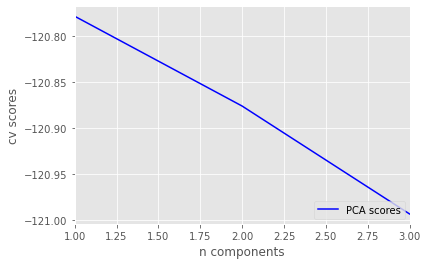

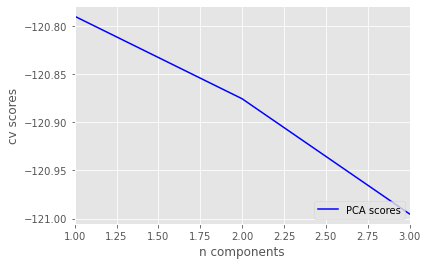

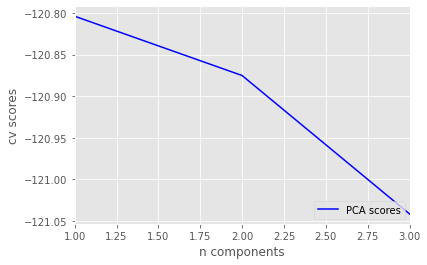

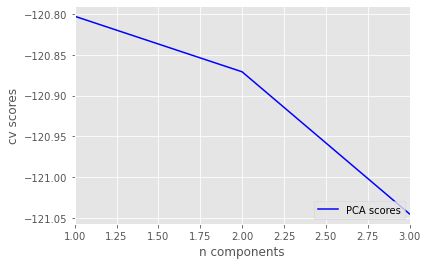

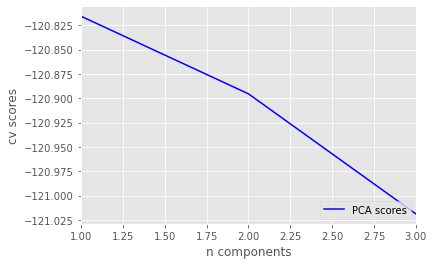

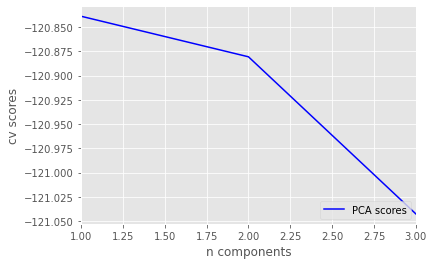

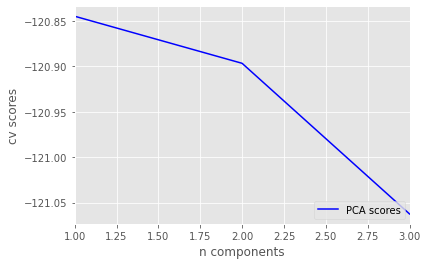

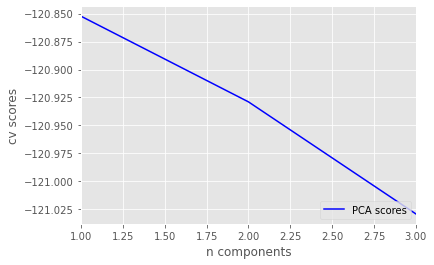

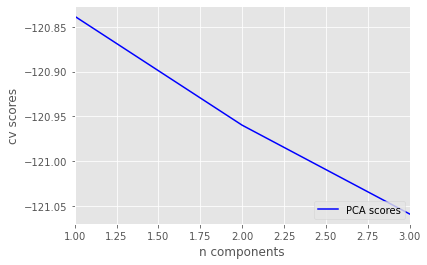

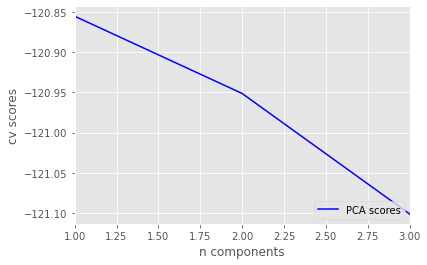

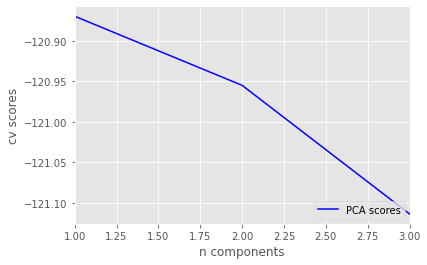

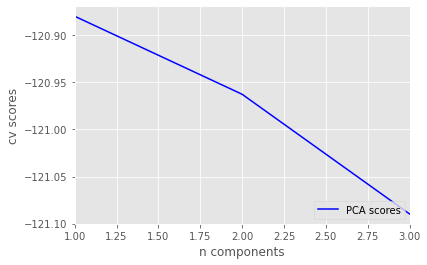

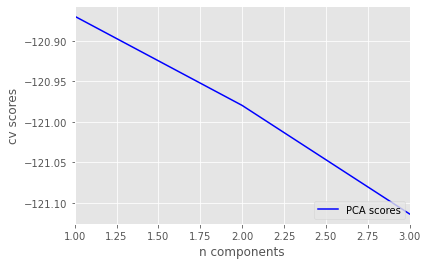

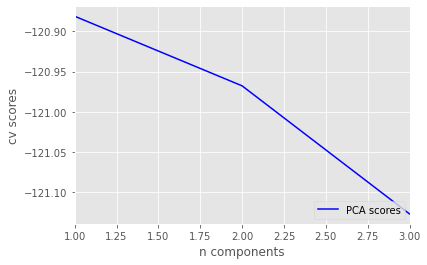

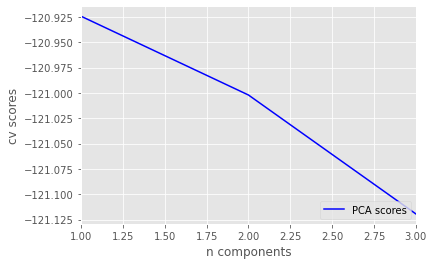

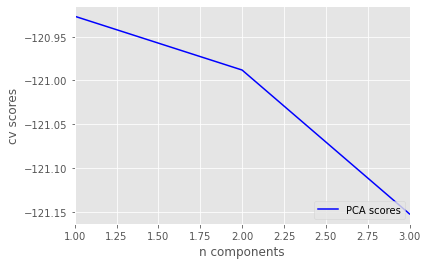

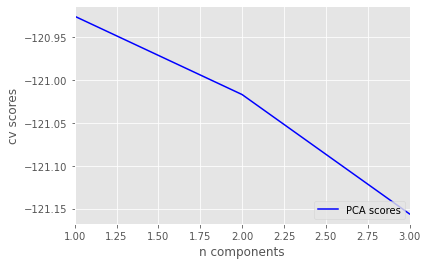

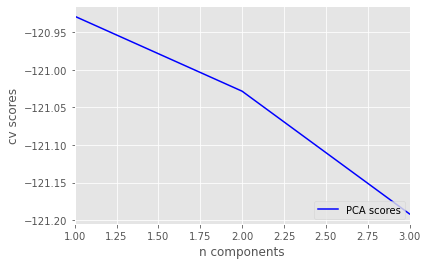

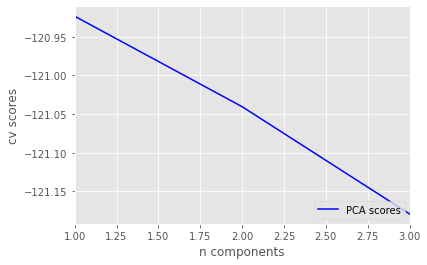

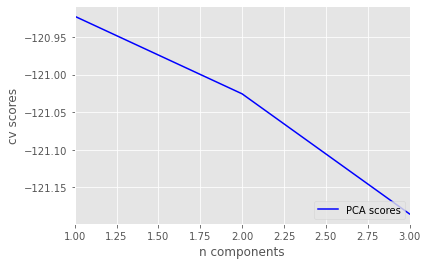

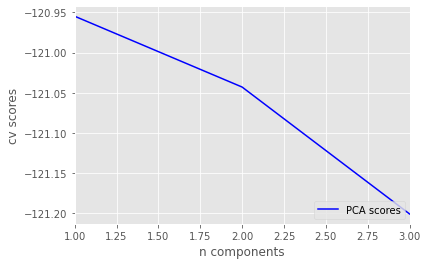

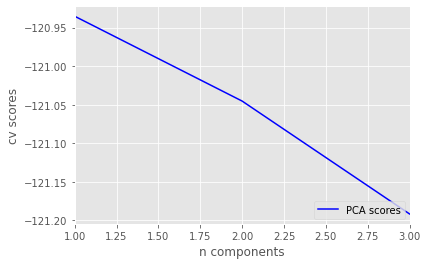

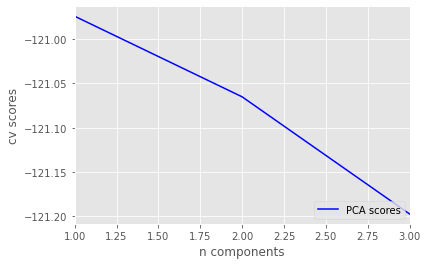

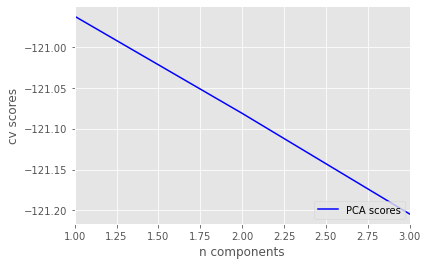

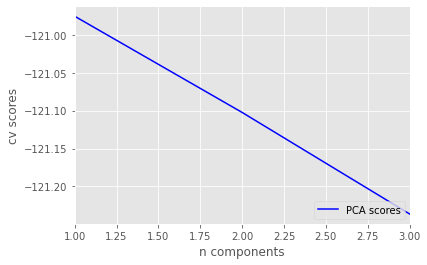

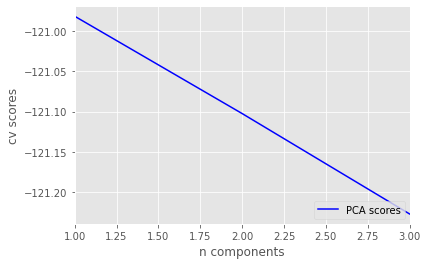

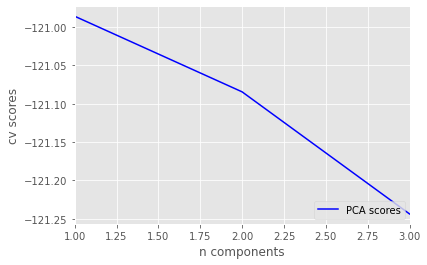

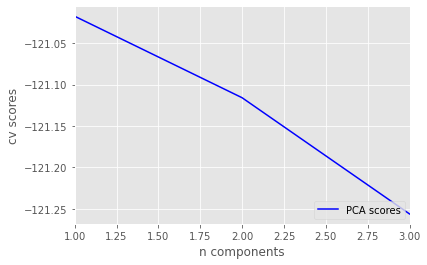

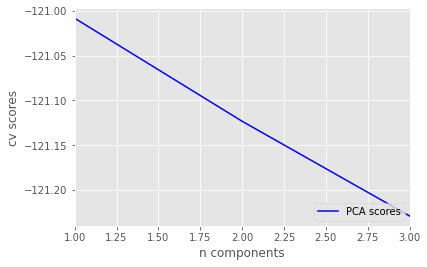

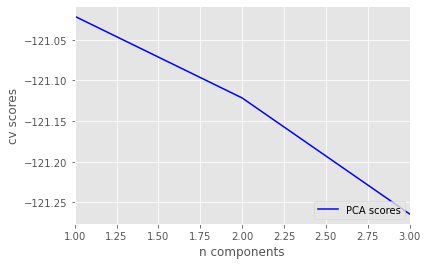

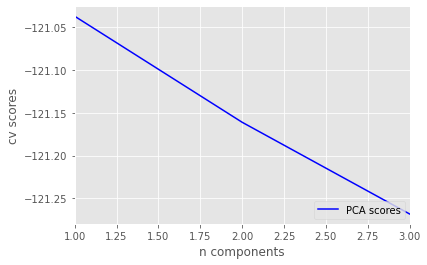

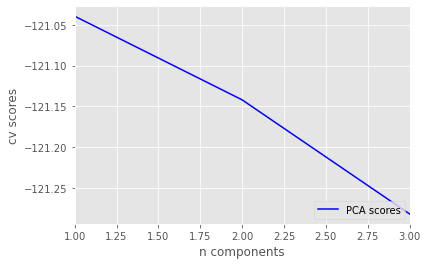

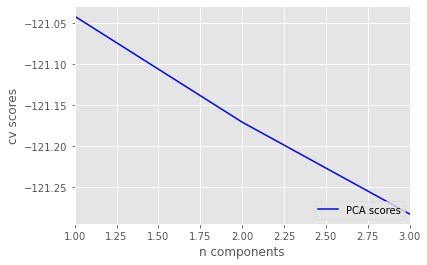

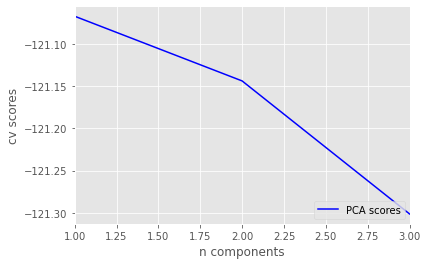

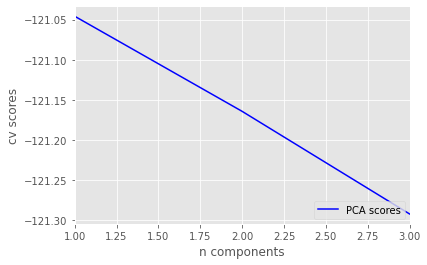

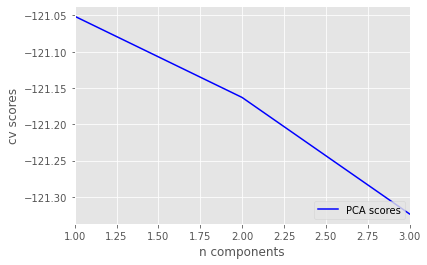

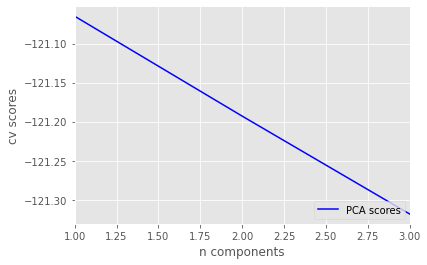

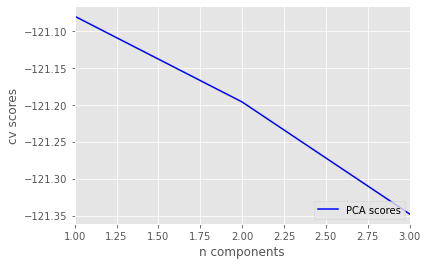

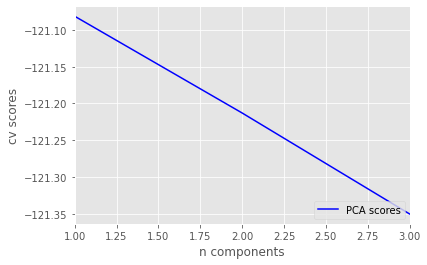

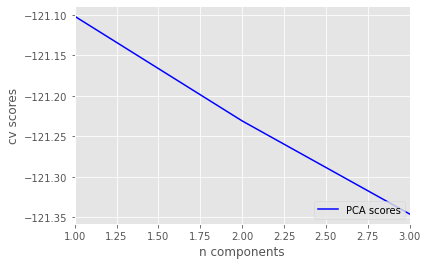

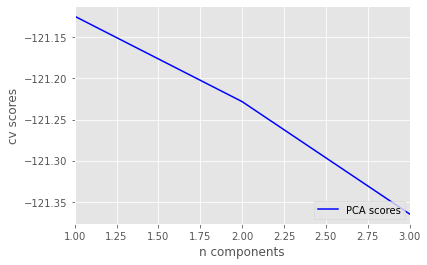

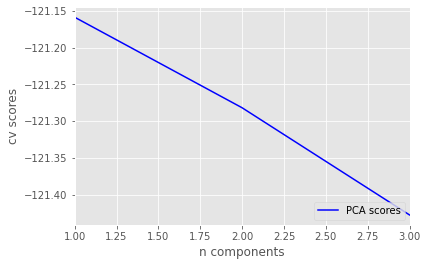

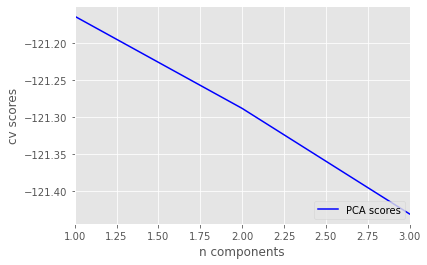

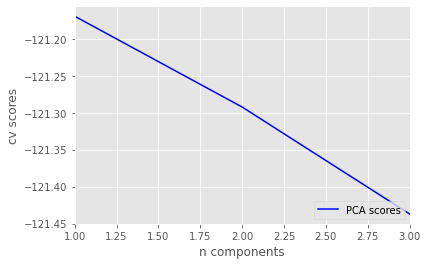

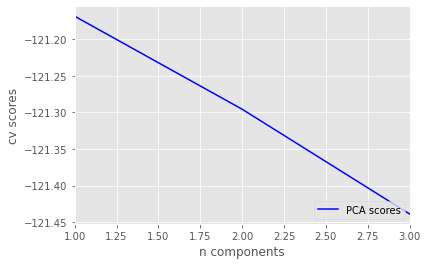

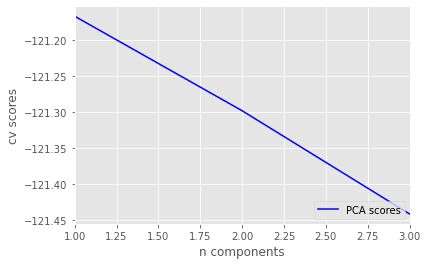

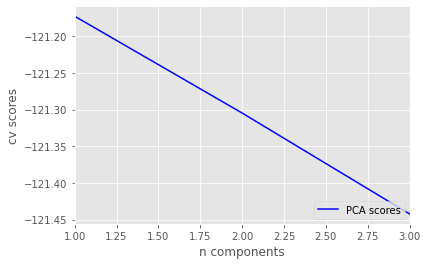

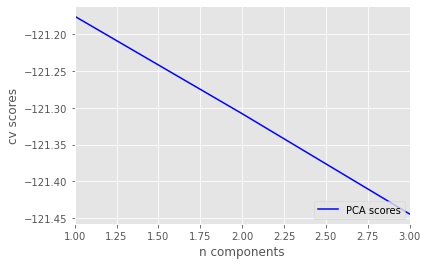

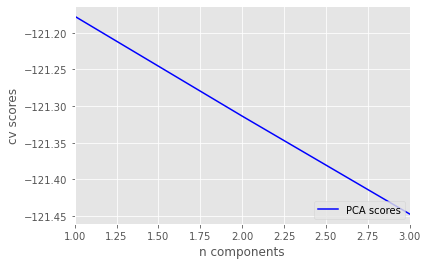

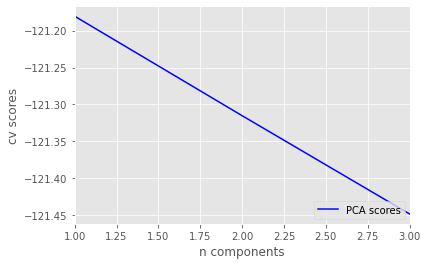

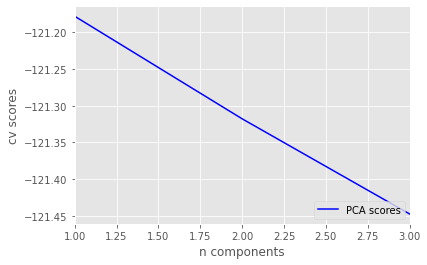

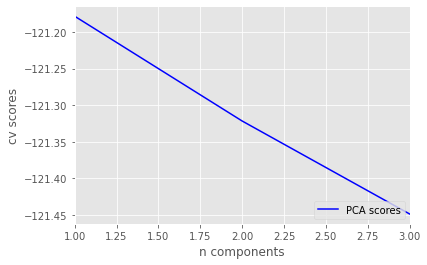

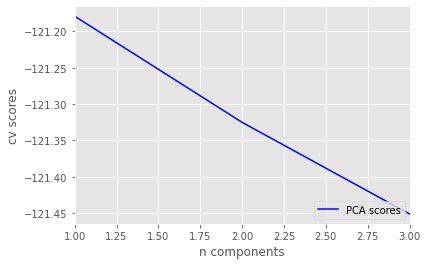

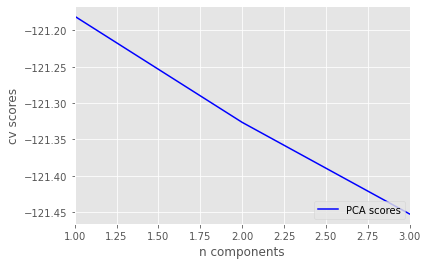

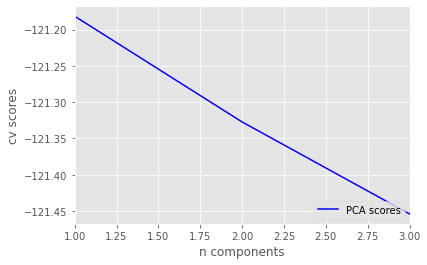

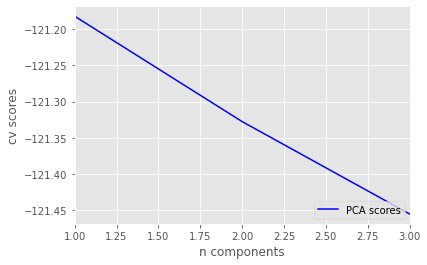

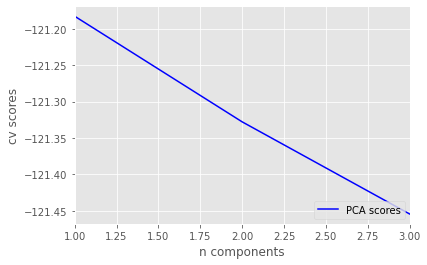

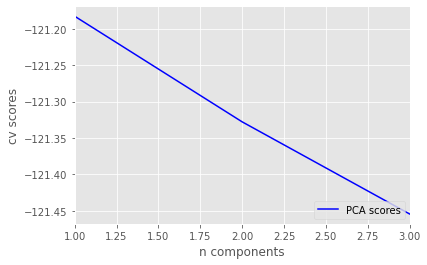

In [31]:
mean_scores = []
for d in range(1,D+1):
    model = PCA(n_components=d)
    scores = cv_score(model, data, cv=3)
    plot_scores(scores)
    #print(scores)
    mean_scores.append(np.mean(scores))

In [24]:
mean_scores

[-122.38077752032154,
 -122.32496054058191,
 -122.27612021885265,
 -122.2270496947696,
 -122.15103616074977,
 -122.08855687817908,
 -122.01250757665109,
 -121.95982043815418,
 -121.88281110541044,
 -121.79408481694288,
 -121.72254671877545,
 -121.62494509345152,
 -121.55434737137693,
 -121.49427921247899,
 -121.39755221561516,
 -121.31828337153559,
 -121.20880756393099,
 -121.08200406902715,
 -120.9721384761689,
 -120.83939676308755,
 -120.86791659116169,
 -120.85707363622735,
 -120.86444999429892,
 -120.88575574132663,
 -120.90255759884735,
 -120.90310183112244,
 -120.9161384107905,
 -120.93032108630462,
 -120.92964502978215,
 -120.94972446590258,
 -120.94804052350922,
 -120.95966274392185,
 -120.9762653207088,
 -120.97740075229295,
 -120.98959549240196,
 -120.98780464754297,
 -120.99572678446332,
 -121.01525049773295,
 -121.02187007950351,
 -121.02576782744147,
 -121.05641086026283,
 -121.0563052595026,
 -121.05947467214845,
 -121.0751430813151,
 -121.07726831981593,
 -121.0853442269

In [26]:
max(mean_scores)

-120.85409883628712

In [27]:
np.argmax(mean_scores)

19

In [28]:
mean_scores[19]

-120.85409883628712

In [29]:
write_answer_1(str(np.argmax(mean_scores)+1))

## Задание 2. Ручное уменьшение размерности признаков посредством анализа дисперсии данных вдоль главных компонент

In [32]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('data_task2.csv')

In [36]:
data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.848776,-0.666596,-0.724109,-0.584370,-0.460105,1.161415,-0.153160,-2.253871,1.375337,0.561841,...,1.328021,0.615259,1.447412,1.177600,-0.643321,0.005454,-1.075457,0.636591,0.075188,-0.461723
1,0.560569,-0.493592,-0.149612,-0.262415,0.967470,-1.094108,0.815526,0.487121,1.537931,-2.168744,...,0.523245,-0.979103,2.280059,-1.413170,1.146576,-1.179831,0.569553,-0.073751,-0.841962,0.474029
2,-1.484923,-0.622672,0.305978,0.040120,-2.851857,0.092543,-0.029286,-0.624243,-1.155940,0.658744,...,0.916887,1.494340,-1.801660,0.164034,0.467053,-0.872597,0.066600,1.388963,-1.446373,-0.002239
3,-1.487085,-0.252582,-0.429568,-0.124176,-0.547003,0.942490,-0.783337,-0.994770,2.140593,-0.978872,...,-1.177229,-0.892356,-0.166295,-1.507428,1.218209,-0.769020,1.439147,0.713580,0.765335,-0.452884
4,0.462349,0.751057,0.140967,-0.006099,-0.244748,-0.075261,0.924772,0.417142,-0.985730,-1.375670,...,-1.392519,0.502969,1.538669,1.002944,-0.832352,0.990356,-1.733266,-0.201313,-0.834691,-1.118169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.889771,2.134822,0.534229,0.328615,-0.757039,0.316221,-0.355689,0.691996,2.110174,0.244222,...,0.333721,-0.974238,0.761899,-1.487586,0.981804,0.333799,0.199938,0.932029,1.765651,-0.727921
2996,-0.860166,0.045675,1.790978,-0.439106,0.700026,-0.372981,1.037891,-2.011308,0.201522,-0.197561,...,-0.133041,0.368451,0.352533,-1.439751,0.550909,-0.897647,0.034960,1.183466,-0.093656,-0.850018
2997,-0.136113,-0.730800,1.743877,-0.495422,0.092494,1.108405,0.035341,1.245483,-1.885183,0.570221,...,0.041791,0.608347,0.602105,1.394544,2.650644,0.152317,-0.041982,-1.582060,0.081385,0.682217
2998,0.682913,-1.144553,1.542270,1.576389,0.715949,1.972521,-1.556151,1.296414,-0.814292,-0.641504,...,-0.351266,-1.617023,-0.723049,2.123114,0.202444,-0.489891,1.668907,-2.205922,0.292512,-0.395274


In [37]:
D = data.shape[1]
model = PCA(n_components=D)


PCA(n_components=100)

In [39]:
model.fit_transform(data)

array([[-0.30344764, -1.29751281, -0.70239267, ..., -1.47730224,
         1.11629147, -0.25244507],
       [-0.0915355 ,  0.65052226, -0.65268647, ...,  0.56431176,
        -0.10094539,  0.60052524],
       [-3.99384512,  0.79041553, -1.31979412, ...,  1.0193418 ,
         1.40797114, -0.38080938],
       ...,
       [ 0.67301685,  1.93241625, -1.38363548, ...,  1.13264246,
        -0.91510327,  0.42195635],
       [-1.79057231, -1.09341789, -1.97410919, ..., -0.41204847,
        -0.58160393,  0.61332383],
       [-0.47895175,  1.62999541, -0.95251304, ..., -0.58667374,
         1.06193847, -2.01845297]])

In [42]:
variances = model.explained_variance_

In [41]:
model.explained_variance_.size

100

In [43]:
variances

array([2.45300783, 2.34721594, 2.32837423, 2.29215638, 2.26058883,
       2.23673763, 2.23054413, 2.16149946, 2.12419737, 2.11722001,
       2.101506  , 2.08661632, 2.06952524, 2.01874997, 2.01569559,
       1.9975306 , 1.98999226, 1.97267641, 1.96145946, 1.93571547,
       1.91127464, 1.88088269, 1.87313498, 1.86100004, 1.83748995,
       1.83102547, 1.76695482, 1.75990976, 1.70900529, 1.67441869,
       1.30213235, 1.27412642, 1.25988718, 1.24829741, 1.2373551 ,
       1.22655268, 1.2160363 , 1.20337612, 1.19178072, 1.17704893,
       1.17152643, 1.1596937 , 1.14421427, 1.13733863, 1.1280918 ,
       1.12091597, 1.11941323, 1.10887359, 1.10153552, 1.09280867,
       1.08081406, 1.071599  , 1.06894519, 1.05953135, 1.05917675,
       1.03999244, 1.03181196, 1.02157178, 1.01563714, 1.00589789,
       1.00414164, 0.99383921, 0.98822987, 0.9841911 , 0.98022019,
       0.96913754, 0.96047364, 0.95574247, 0.9486803 , 0.94342659,
       0.94097477, 0.93152563, 0.92430892, 0.92160925, 0.91402

In [46]:
variances_sorted_index = np.argsort(variances)
variances_sorted_index

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

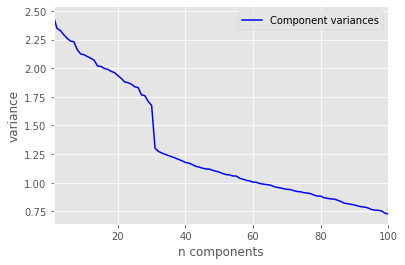

In [47]:
plot_variances(variances)

In [48]:
diff_variances = [(variances[i-1] - variances[i]) for i in range(1,len(variances))]

In [49]:
diff_variances

[0.10579188835897524,
 0.018841717508785827,
 0.03621784187730137,
 0.03156755611894235,
 0.023851194631878236,
 0.006193507921299357,
 0.06904466469061221,
 0.0373020956086898,
 0.00697735920910203,
 0.015714011267099703,
 0.014889677537694546,
 0.017091082428772886,
 0.05077526582704461,
 0.0030543763085653097,
 0.01816499749868572,
 0.0075383315924817396,
 0.01731585272533054,
 0.011216952673026803,
 0.02574398663243649,
 0.024440832590003625,
 0.030391947234640115,
 0.007747714226132185,
 0.012134936284031284,
 0.023510090492492974,
 0.006464476870908564,
 0.06407065775808873,
 0.007045060539367931,
 0.05090446502152335,
 0.034586599391444706,
 0.37228634230581514,
 0.028005929625092962,
 0.014239235877278489,
 0.0115897752407641,
 0.010942306202635477,
 0.010802419155121923,
 0.010516378623159461,
 0.012660183046841134,
 0.011595405625188127,
 0.01473178532410424,
 0.00552249736810051,
 0.011832732054102957,
 0.01547943032515997,
 0.006875638019230301,
 0.009246833218026884,
 0.00

In [50]:
max(diff_variances)

0.37228634230581514

In [51]:
np.argmax(diff_variances)

29

In [52]:
write_answer_2(str(np.argmax(diff_variances)+1))

## Задание 3. Анализ главных компонент при помощи корреляций с исходными признаками.

In [53]:
from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names


In [54]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
model = PCA(svd_solver='full')
data_transformed = model.fit_transform(data)

In [58]:
data_transformed

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

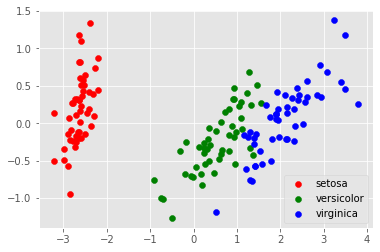

In [59]:
plot_iris(data_transformed, target, target_names)

In [63]:
from scipy.stats import pearsonr
pearson_corr = []
for d_num in np.arange(data.shape[1]):
    pears_1, _ = pearsonr(data[:,d_num], data_transformed[:,0])
    pears_2, _ = pearsonr(data[:,d_num], data_transformed[:,1])
    pearson_corr.append([pears_1, pears_2])

In [67]:
pearson_corr

[[0.8974017619582985, 0.39060441288849224],
 [-0.39874847245570016, 0.8252287092319981],
 [0.9978739422413112, -0.04838059968989225],
 [0.9665475167033071, -0.048781602929395665]]

In [69]:
corr1 = []
corr2 = []
for idx, val in enumerate(pearson_corr):
    if(val[0]>val[1]):
        corr1.append(idx+1)
    else:
        corr2.append(idx+1)

In [70]:
corr1

[1, 3, 4]

In [71]:
corr2

[2]

In [72]:
write_answer_3(corr1, corr2)

## Задание 4. Анализ главных компонент при помощи вкладов в их дисперсию отдельных объектов

In [73]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

data = fetch_olivetti_faces(shuffle=True, random_state=0).data
image_shape = (64, 64)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Asus\scikit_learn_data


In [79]:
pca = PCA(n_components=10, svd_solver='randomized')

In [78]:
data

array([[0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
        0.07438017],
       [0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
        0.6528926 ],
       [0.37190083, 0.34710744, 0.3677686 , ..., 0.7066116 , 0.6818182 ,
        0.5495868 ],
       ...,
       [0.55785125, 0.60330576, 0.6570248 , ..., 0.17768595, 0.20661157,
        0.19421488],
       [0.5206612 , 0.5206612 , 0.53305787, ..., 0.46694216, 0.43801653,
        0.43801653],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067]], dtype=float32)

In [80]:
tansformed_data = pca.fit_transform(data)

In [87]:
tansformed_data.shape

(400, 10)

In [88]:
tansformed_data

array([[ 0.8157975 , -4.144038  ,  2.4832633 , ..., -2.1642873 ,
         0.2508866 , -0.6026701 ],
       [ 3.8633647 , -1.3345662 , -5.423968  , ..., -0.4070376 ,
        -1.0705047 ,  0.48840705],
       [ 4.869935  , -0.55865604, -0.88419926, ...,  1.2692723 ,
         2.128895  , -1.6200309 ],
       ...,
       [-2.0034714 , -1.8449593 ,  5.7545896 , ..., -0.65309536,
        -1.5434102 ,  1.4831344 ],
       [-1.9705242 ,  3.378712  ,  2.0699847 , ..., -0.71872526,
         0.81398046,  1.0053852 ],
       [-4.105234  ,  1.9917215 , -0.05972186, ..., -0.93024   ,
         0.6827521 , -1.2624929 ]], dtype=float32)

In [82]:
def cosine_metric(x, i):
    return x[i]**2 / np.sum(x**2)

In [85]:
cos_matrix = []
for i, item in enumerate(tansformed_data):
    cos_matrix_obj = []
    for j in np.arange(len(item)):
        cos_matrix_obj.append(cosine_metric(item, j))
    cos_matrix.append(cos_matrix_obj)


In [86]:
cos_matrix

[[0.02069523427153365,
  0.5340145606750997,
  0.19175695418331004,
  0.025360666988521272,
  0.02149226929268993,
  0.02442231020466136,
  0.023347845759348118,
  0.14565836546526148,
  0.001957313959542071,
  0.011294443870595227],
 [0.2498673772040126,
  0.02981661999530838,
  0.49250694128548433,
  0.040382423454154104,
  0.15905619306520133,
  0.00011713975573245255,
  0.0023015948415241066,
  0.002773621353904267,
  0.019184711515827225,
  0.003993392380573842],
 [0.38764441399026317,
  0.005101245054145526,
  0.012778724003812855,
  0.08488521679168806,
  0.31538284303234937,
  0.04276509528602637,
  0.008132863578085812,
  0.026332786491959012,
  0.07407909984738821,
  0.042897677526247874],
 [0.24867688865409365,
  0.1534393366332484,
  0.0010502683774362036,
  0.040931200912426566,
  0.08736428291156698,
  0.010110721447604696,
  0.2224462846610062,
  0.15445321939188958,
  0.08024087092660782,
  0.0012869505502620332],
 [0.22460193175820822,
  0.10347946954315831,
  0.258711

In [95]:
cos_matrix[1][0]

0.2498673772040126

In [98]:
df = pd.DataFrame(cos_matrix)

In [99]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.020695,0.534015,0.191757,0.025361,0.021492,0.024422,0.023348,0.145658,0.001957,0.011294
1,0.249867,0.029817,0.492507,0.040382,0.159056,0.000117,0.002302,0.002774,0.019185,0.003993
2,0.387644,0.005101,0.012779,0.084885,0.315383,0.042765,0.008133,0.026333,0.074079,0.042898
3,0.248677,0.153439,0.001050,0.040931,0.087364,0.010111,0.222446,0.154453,0.080241,0.001287
4,0.224602,0.103479,0.258712,0.005685,0.291848,0.056380,0.016804,0.006801,0.009817,0.025872
...,...,...,...,...,...,...,...,...,...,...
395,0.677369,0.000245,0.032074,0.116359,0.011049,0.084593,0.051816,0.002603,0.018436,0.005455
396,0.374736,0.046882,0.142425,0.031441,0.021274,0.033163,0.118366,0.144640,0.084247,0.002826
397,0.077193,0.065461,0.636854,0.008204,0.052965,0.053617,0.009388,0.008203,0.045811,0.042303
398,0.115946,0.340874,0.127946,0.000350,0.266165,0.078908,0.004421,0.015425,0.019784,0.030183


In [100]:
df.shape

(400, 10)

In [101]:
df[0]

0      0.020695
1      0.249867
2      0.387644
3      0.248677
4      0.224602
         ...   
395    0.677369
396    0.374736
397    0.077193
398    0.115946
399    0.568291
Name: 0, Length: 400, dtype: float64

In [107]:
max_contribution_indx = []
for i in range(df.shape[1]):
    max_contribution_indx.append(np.argmax(df[i]))

In [102]:
max(df[0])

0.9496193480004536

In [103]:
np.argmax(df[0])

197

In [111]:
max_contribution_indx

[197, 18, 66, 319, 363, 131, 142, 382, 353, 140]

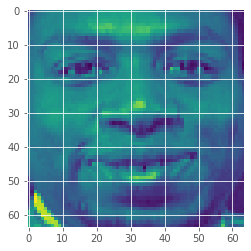

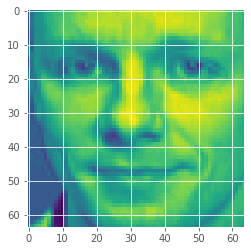

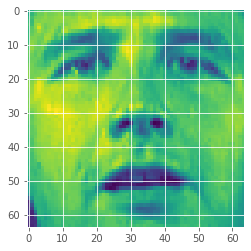

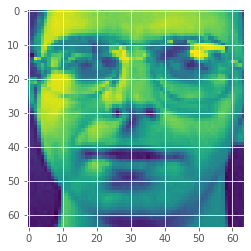

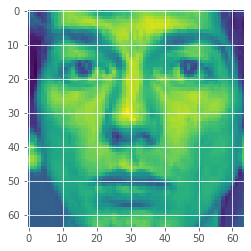

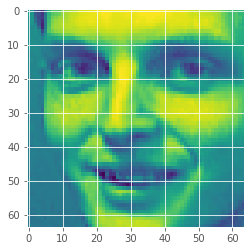

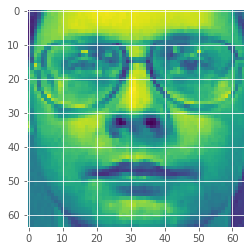

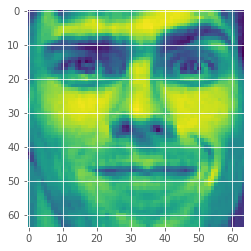

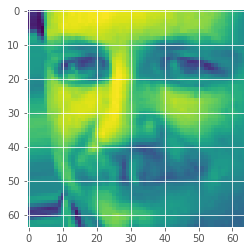

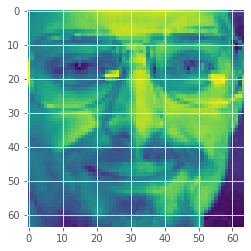

In [113]:
for el in max_contribution_indx:
    plt.imshow(data[el].reshape(image_shape))
    plt.show()

In [114]:
write_answer_4(max_contribution_indx)

## Анализ основных недостатков метода главных компонент

### Направления с максимальной дисперсией в данных неортогональны

<ipython-input-115-14e8e9ec00d6>:7: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mu, C2, size=50)])


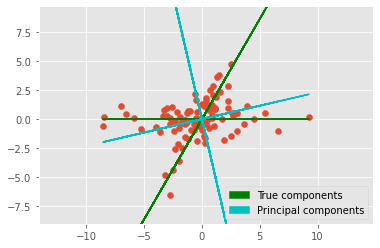

In [115]:
C1 = np.array([[10,0],[0,0.5]])
phi = np.pi/3
C2 = np.dot(C1, np.array([[np.cos(phi), np.sin(phi)],
                          [-np.sin(phi),np.cos(phi)]]))

data = np.vstack([np.random.multivariate_normal(mu, C1, size=50),
                  np.random.multivariate_normal(mu, C2, size=50)])
plt.scatter(data[:,0], data[:,1])
# построим истинные интересующие нас компоненты
plt.plot(data[:,0], np.zeros(data[:,0].size), color="g")
plt.plot(data[:,0], 3**0.5*data[:,0], color="g")
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

### Интересное направление в данных не совпадает с направлением максимальной дисперсии

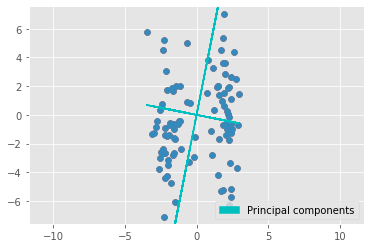

In [117]:
C = np.array([[0.5,0],[0,10]])
mu1 = np.array([-2,0])
mu2 = np.array([2,0])

data = np.vstack([np.random.multivariate_normal(mu1, C, size=50),
                  np.random.multivariate_normal(mu2, C, size=50)])
plt.scatter(data[:,0], data[:,1])
# обучим модель pca и построим главные компоненты
model = PCA(n_components=2)
model.fit(data)
plot_principal_components(data, model)
plt.draw()